# Cosine Encoding

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
def DNAEncoding(sequence):
    # Define the basis states |0⟩ and |1⟩
    zero = np.array([1, 0])
    one = np.array([0, 1])
    
    # Create a quantum circuit with one qubit for each base in the DNA sequence
    n = len(sequence)
    qc = QuantumCircuit(n, n)
    
    # Encode each base in the DNA sequence as a quantum state
    for i in range(n):
        base = sequence[i]
        if base == 'A':
            qc.initialize(zero, [i])
        elif base == 'C':
            qc.initialize(one, [i])
        elif base == 'G':
            qc.x(i)
            qc.initialize(zero, [i])
        elif base == 'T':
            qc.x(i)
            qc.initialize(one, [i])
    
    # Apply the quantum Fourier transform to each qubit
    for i in range(n):
        qc.h(i)
        for j in range(i+1, n):
            qc.cp(np.pi/(2**(j-i)), j, i)
            
    # Measure the qubits to obtain classical data
    qc.measure(range(n), range(n))
    
    # Simulate the quantum circuit using the qasm simulator
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()

    # get the statevector from the result and print it
    statevector = result.get_statevector(qc)
    
    return statevector


### Example 0:

In [3]:
sequence='ATC'
statevector=DNAEncoding(sequence)
print(statevector)

Statevector([ 0.        +0.j        , -0.        +0.j        ,
              0.        +0.j        ,  0.70710678+0.70710678j,
             -0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        -0.j        ],
            dims=(2, 2, 2))


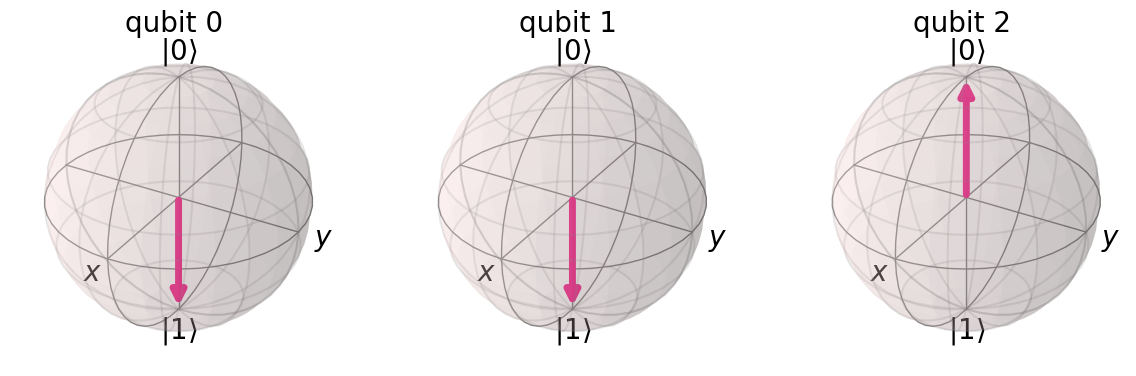

In [4]:
x=plot_bloch_multivector(statevector)
x.savefig('ATC-cosine-bloch.png', dpi=300)
x

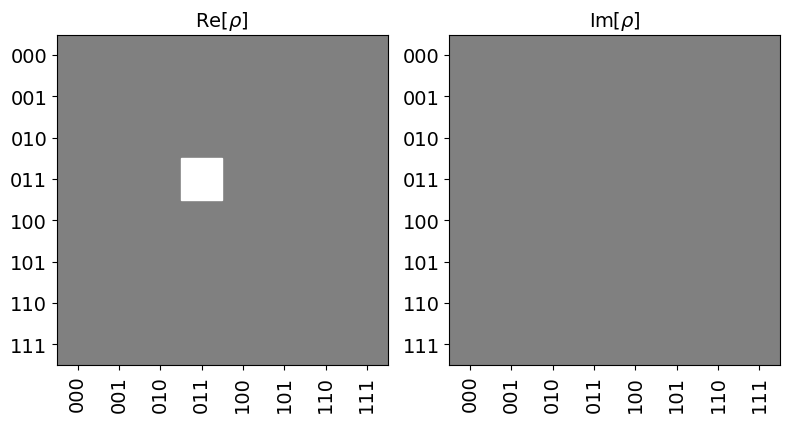

In [5]:
x=plot_state_hinton(statevector)
x.savefig('ATC-cosine-hinton.png', dpi=300)
x

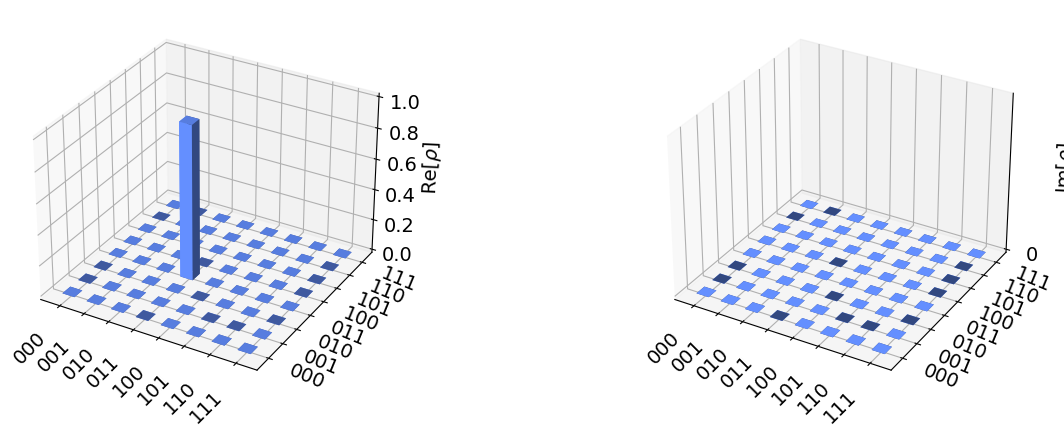

In [6]:
x=plot_state_city(statevector)
x.savefig('ATC-cosine-city.png', dpi=300)
x

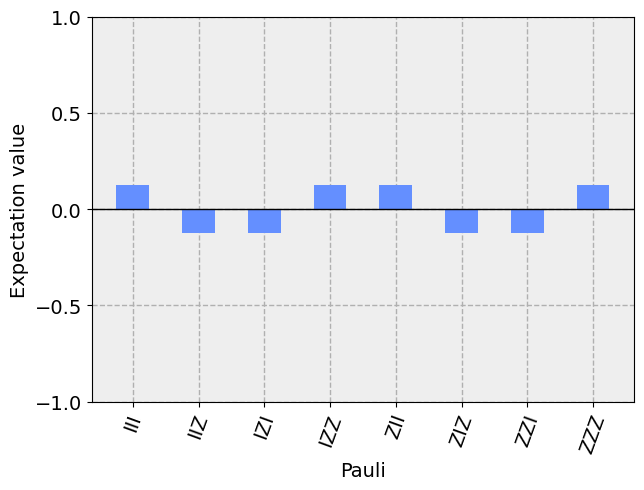

In [7]:
x=plot_state_paulivec(statevector)
x.savefig('ATC-cosine-pauli.png', dpi=300)
x

### Example 1: 

In [8]:
seq =  "A"
statevector = DNAEncoding(seq)
print(statevector)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


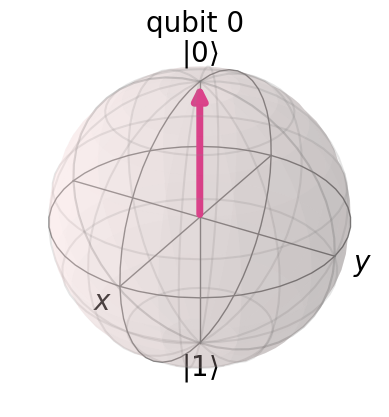

In [9]:
x=plot_bloch_multivector(statevector)
x.savefig('A-cosine-bloch.png', dpi=300)
x

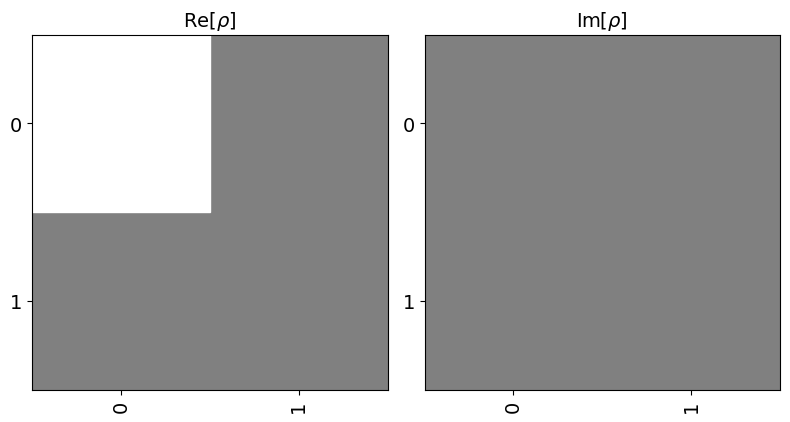

In [10]:
x=plot_state_hinton(statevector)
x.savefig('A-cosine-hinton.png', dpi=300)
x

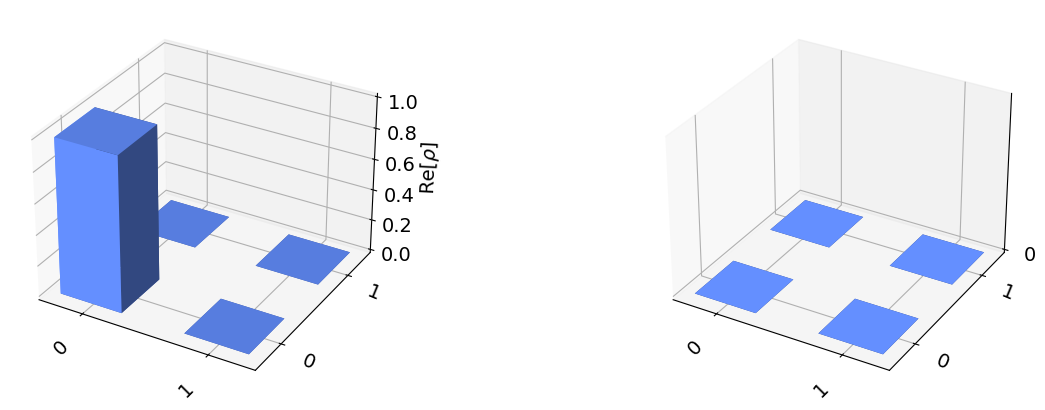

In [11]:
x=plot_state_city(statevector)
x.savefig('A-cosine-city.png', dpi=300)
x

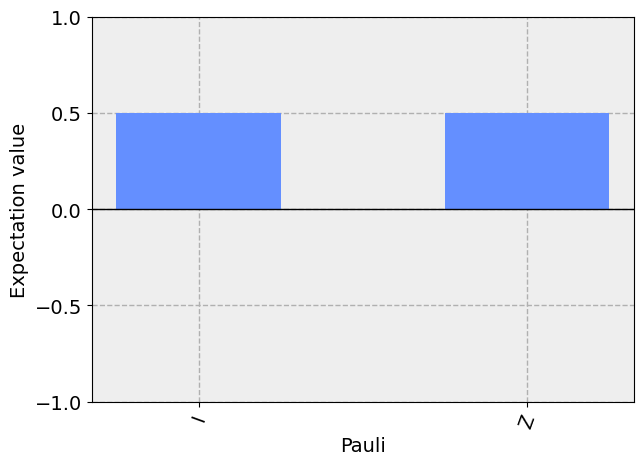

In [12]:
x=plot_state_paulivec(statevector)
x.savefig('A-cosine-pauli.png', dpi=300)
x

### Example 2: 

In [13]:
seq =  "ATCG"
statevector = DNAEncoding(seq)
print(statevector)

Statevector([ 0.000000e+00+0.j, -0.000000e+00+0.j,  0.000000e+00-0.j,
              0.000000e+00+0.j, -0.000000e+00+0.j,  0.000000e+00+0.j,
              0.000000e+00+0.j,  0.000000e+00+0.j,  0.000000e+00+0.j,
             -0.000000e+00+0.j, -3.061617e-16-1.j,  0.000000e+00+0.j,
             -0.000000e+00+0.j,  0.000000e+00+0.j,  0.000000e+00+0.j,
              0.000000e+00+0.j],
            dims=(2, 2, 2, 2))


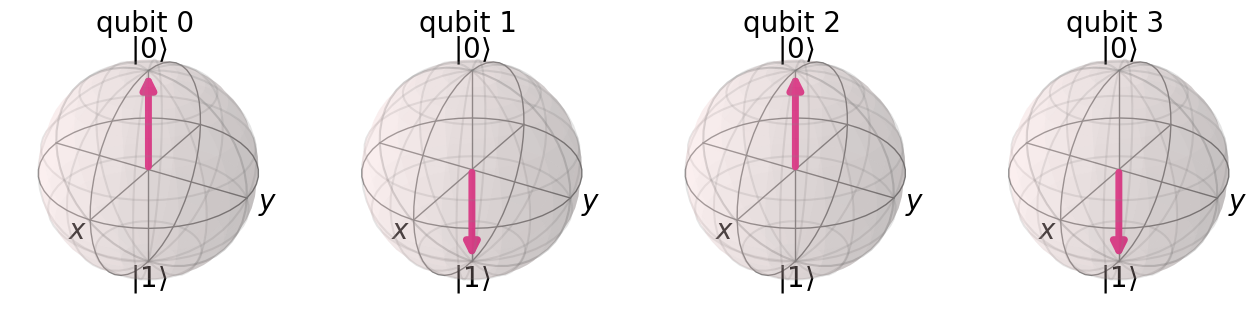

In [14]:
x=plot_bloch_multivector(statevector)
x.savefig('ATCG-cosine-bloch.png', dpi=300)
x

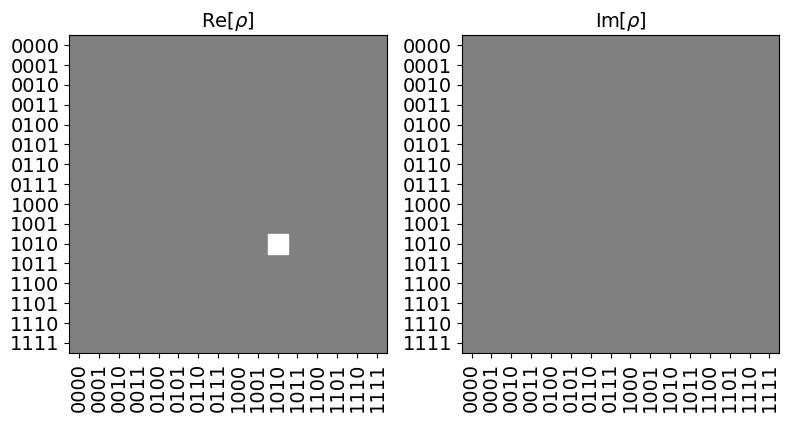

In [15]:
x=plot_state_hinton(statevector)
x.savefig('ATCG-cosine-hinton.png', dpi=300)
x

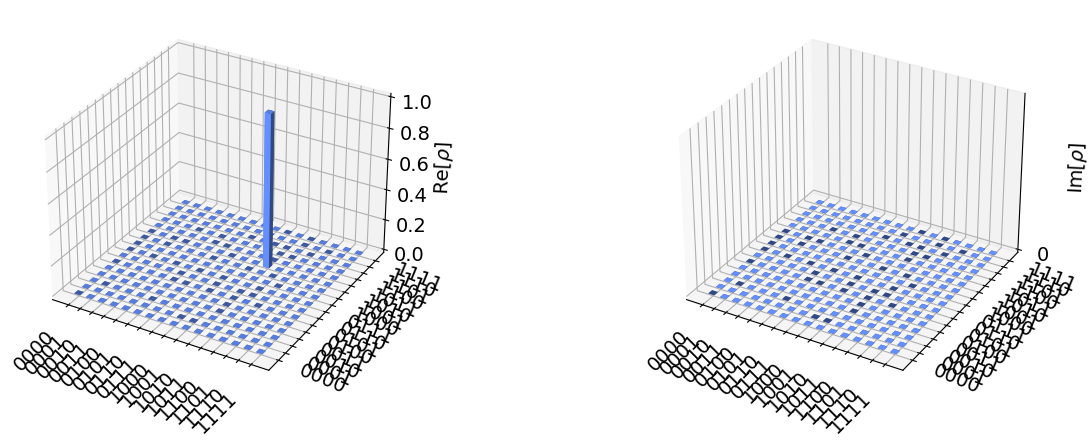

In [16]:
x=plot_state_city(statevector)
x.savefig('ATCG-cosine-city.png', dpi=300)
x

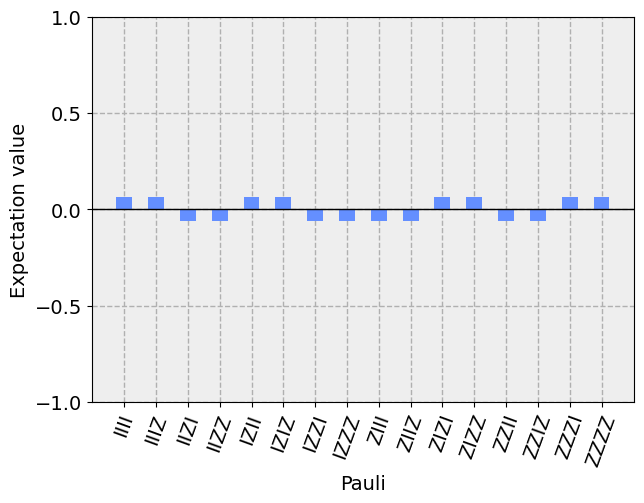

In [17]:
x=plot_state_paulivec(statevector)
x.savefig('ATCG-cosine-pauli.png', dpi=300)
x

### Example 3: 

In [18]:
seq =  "ACTGACGTAGC"
statevector = DNAEncoding(seq)
print(statevector)

Statevector([ 0.+0.j, -0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


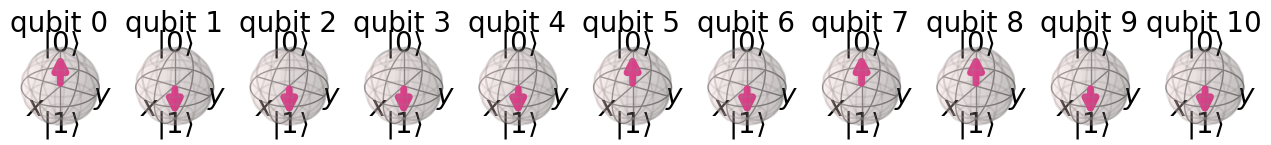

In [19]:
x=plot_bloch_multivector(statevector)
x.savefig('ACTGACGTAGC-cosine-bloch.png', dpi=300)
x

In [20]:
# x=plot_state_hinton(statevector)
# x.savefig('ACTGACGTAGC-cosine-hinton.png', dpi=300)
# 

In [21]:
# x=plot_state_city(statevector)
# x.savefig('ACTGACGTAGC-cosine-city.png', dpi=300)
# x

In [22]:
# x=plot_state_paulivec(statevector)
# x.savefig('ACTGACGTAGC-cosine-pauli.png', dpi=300)
# x

### Example 4:

In [23]:
seq =  "ACTGACG"
statevector = DNAEncoding(seq)
print(statevector)

Statevector([ 0.        +0.j        , -0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
             -0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        , -0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
             -0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        , -0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
             -0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        , -0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j  

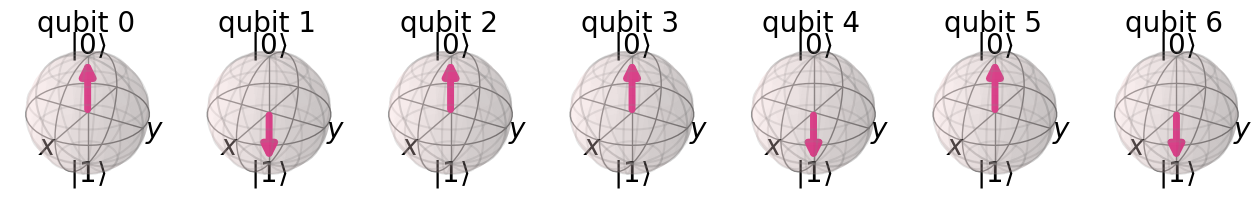

In [24]:
x=plot_bloch_multivector(statevector)
x.savefig('ACTGACG-cosine-bloch.png', dpi=300)
x

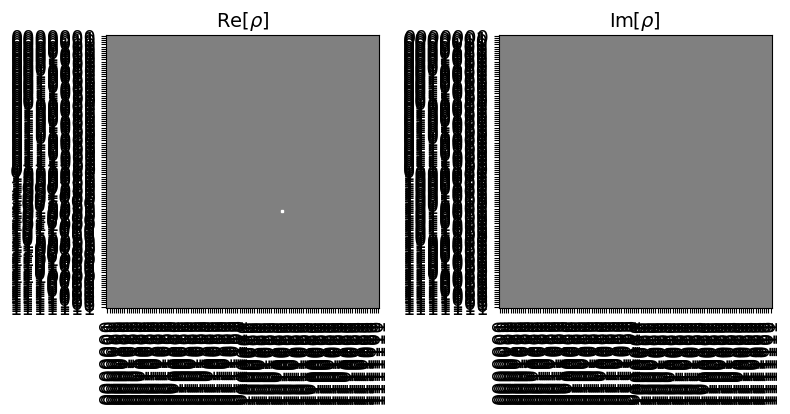

In [25]:
x=plot_state_hinton(statevector)
x.savefig('ACTGACG-cosine-hinton.png', dpi=300)
x

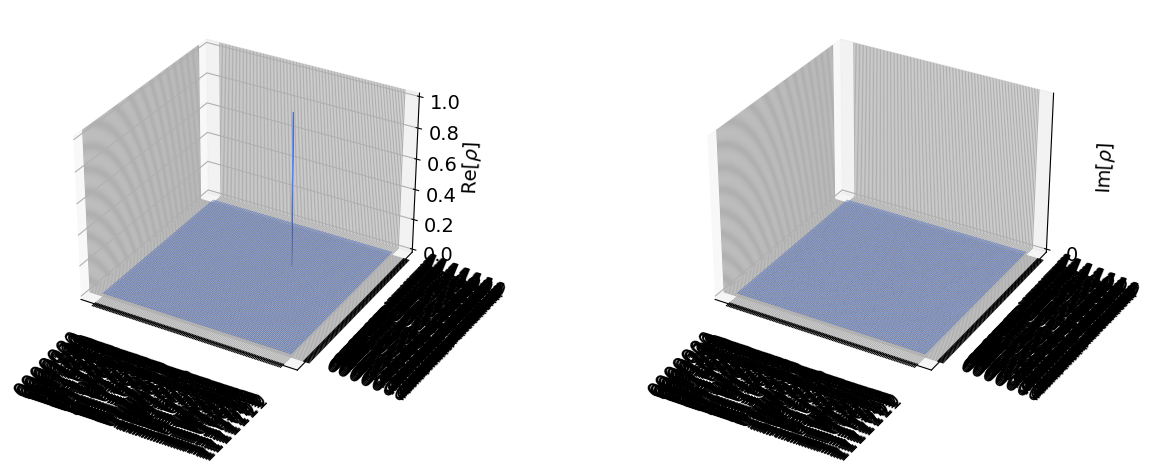

In [26]:
x=plot_state_city(statevector)
x.savefig('ACTGACG-cosine-city.png', dpi=300)
x

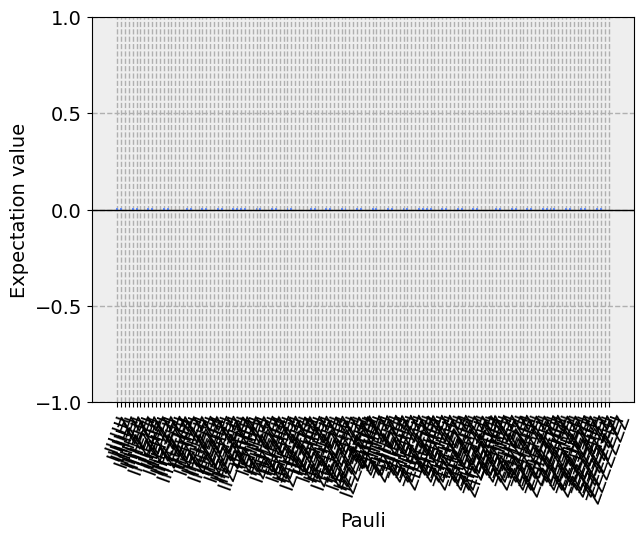

In [27]:
x=plot_state_paulivec(statevector)
x.savefig('ACTGACG-cosine-pauli.png', dpi=300)
x